In [38]:
import sys
sys.path.insert(0, '../')

In [39]:
import os
import cv2
import glob
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from   tensorflow.keras.layers import Input
from   tensorflow.keras.applications.inception_v3 import InceptionV3
from   utils.data_prep_utils import LABELS, DATES, prep_data, VID_CAT, prep_categorized_data
from   utils.train_utils import prep_data_train_val_test, set_curr_time, show_sample
from sklearn.metrics import recall_score, precision_score

# from utils.data_prep_utils import DATES, VID_CAT, prep_categorized_data
# from utils.train_utils import prep_data_train_val_test, show_sample

In [40]:
labels = ['zeev', 'or', 'felix', 'ron', 'aviya']

In [42]:
# x_train, x_valid, x_test, y_train, y_valid, y_test = prep_data_train_val_test(DATES, labels,
#                                                                               frames_size=32, is_dim_3d=False)
x_train, x_valid, x_test, y_train, y_valid, y_test = prep_data_train_val_test(DATES, labels, frames_size=128)

100%|██████████| 3000/3000 [00:01<00:00, 1786.51it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1774.85it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 30000/30000 [00:17<00:00, 1716.86it/s]
0it [00:00, ?it/s]
100%|██████████| 21000/21000 [00:13<00:00, 1524.25it/s]
0it [00:00, ?it/s]
100%|██████████| 21000/21000 [00:14<00:00, 1468.58it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [43]:
# best_loaded = tf.keras.models.load_model('../models/[64, 5, 2, 0.4, 256, 0.4, 128, 0.4]_2019525_11_21.h5')
# test_predictions = best_loaded.predict(x_test)

In [44]:
x_train_rgb = np.repeat(x_train[..., np.newaxis], 3, -1)
x_val_rgb = np.repeat(x_valid[..., np.newaxis], 3, -1)
x_test_rgb = np.repeat(x_test[..., np.newaxis], 3, -1)

In [45]:
input_tensor = Input(shape=(128, 128, 3))

In [41]:
# best_loaded = tf.keras.models.load_model('../models/inceptionv3_201978_16_51.h5')

best_loaded = tf.keras.models.load_model('../models/inceptionv3_201979_1_48.h5')


In [46]:
# calculate recall
y_pred=best_loaded.predict(x_test_rgb)
y_test_calss=np.argmax(y_pred,axis=1)
print(recall_score(y_test, y_test_calss, average='macro'))

# calculate precision
print(precision_score(y_test, y_test_calss, average='macro'))

# calculate accuracy
print(best_loaded.evaluate(x_test_rgb, y_test)[1])

0.9996303030303031
0.9996370235934664
14100/14100 [==============================] - 12s 817us/step
0.9995744680851064


In [ ]:
# acc = 0
# total = 0
# predicted_dict = {}

# for lbl in labels:
#     predicted_dict[lbl] = []

# for i, lbl in enumerate(y_test):
# #     if lbl != 1:
#         total += 1
#         predicted_dict[labels[lbl]].append(np.float16(test_predictions[i]))
#         if np.argmax(test_predictions[i]) == lbl:
#             acc += 1
# #     else:
# #         print(lbl)
# print('acc: ', (acc/total*100))

### plotting

In [8]:
test_predictions.shape

(14200, 5)

In [9]:
def plot_graph(test_predictions, labels, title):
    # rows = num_of_pics; cols = array_of_preds(labels)
    data = test_predictions

    x = np.arange(data.shape[0])
    dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
    d = 1./(data.shape[1]+2.)

    fig, ax=plt.subplots()
    for i in range(data.shape[1]):
        ax.bar(x,data[:,i], width=d, label="label {}".format(labels[i]))

    plt.xticks(np.arange(data.shape[0]),[i for i in range(test_predictions.shape[0])])
    plt.title("{0}'s Graph".format(lbl))
    plt.xlabel("number of pictures")
    plt.ylabel("output of prediction")
    plt.legend(framealpha=1).draggable()
    plt.gcf().set_size_inches(15, 5, forward=True)
    plt.show()

In [10]:
#todo:
# 1. graph with specific frames per person and total (frames with water, withous, angry, happy, etc.)
# 2. graph of persons outside our training set
# 3. all graphs -> mean & std

/Users/zeevkalyuzhner/.virtualenvs/speckles-ml/lib/python3.7/site-packages/matplotlib/legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


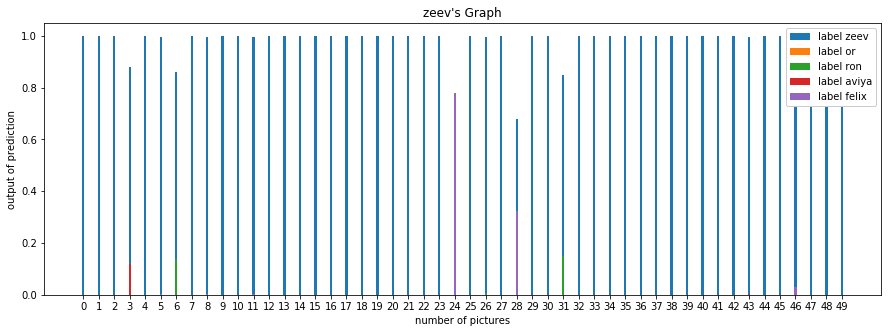

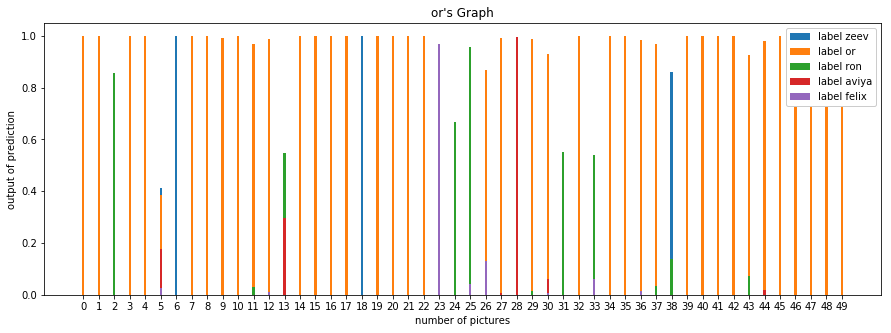

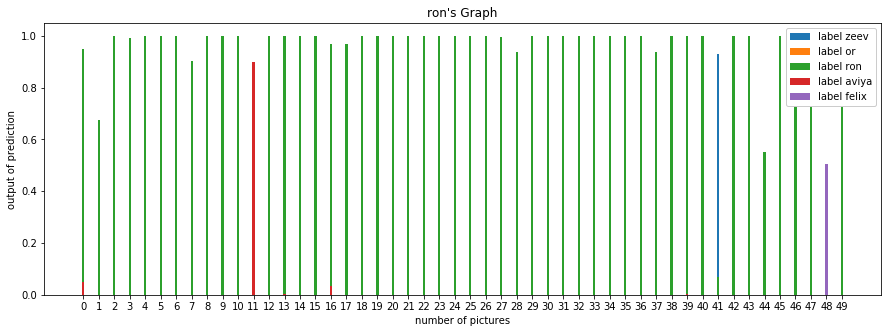

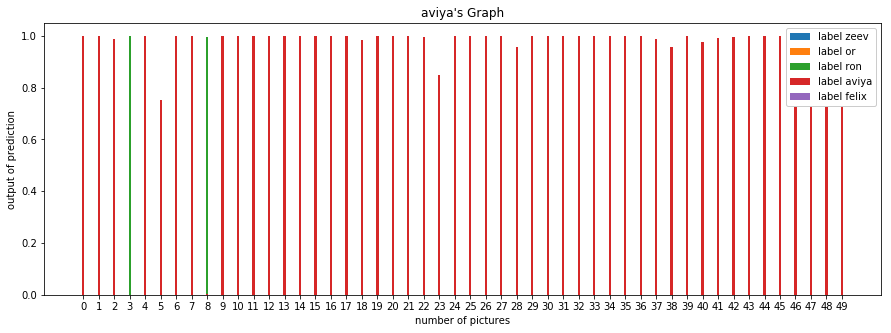

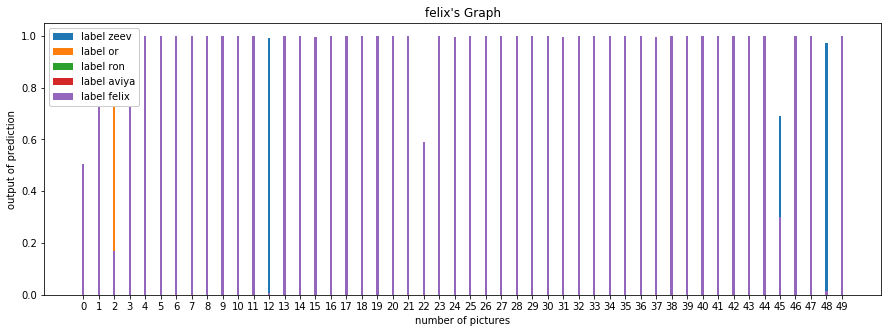

In [11]:
for lbl, val in predicted_dict.items():
    np.random.shuffle(val)
    plot_graph(np.array(val[:50]), labels, lbl)

### 02.06.2019 meeting summary:
TODO:
1. graph with specific frames per person and total (frames with water, withous, angry, happy, etc.)
2. graph of persons outside our training set
3. all graphs -> mean & std

### splitting videos categories

In [ ]:
prep_categorized_data(DATES, labels, VID_CAT, frames_size=128)

##### graph I

In [12]:
dd = {}

for i, l in enumerate(labels):
    dd[l] = {}
    for vc in VID_CAT:
        dd[l][vc] = {}
        dd[l][vc]['x'] = []
        dd[l][vc]['y'] = []
        for d in DATES:
            for f in tqdm(glob.glob('../data/categorized_frames/{0}/{1}/128/{2}/*.png'.format(d, l, vc))):
                dd[l][vc]['x'].append(cv2.imread(f, cv2.IMREAD_GRAYSCALE))
                dd[l][vc]['y'].append(i)
        dd[l][vc]['x'] = np.asarray(dd[l][vc]['x'])
        dd[l][vc]['y'] = np.asarray(dd[l][vc]['y'])

100%|██████████| 3000/3000 [00:01<00:00, 1738.51it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1729.18it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1730.92it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1717.77it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1697.79it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1691.85it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1694.32it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1679.12it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1644.20it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1697.07it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:01<00:00, 1659.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██

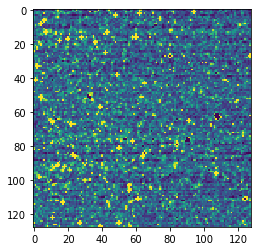

(None, 0)

In [13]:
show_sample(dd['zeev']['regular']['x'], 0), dd['zeev']['regular']['y'][0]

In [14]:
len(dd['ron']['smile']['x']), len(dd['or']['smile']['x'])

(3000, 3000)

In [15]:
for k, v in tqdm(dd.items()):
    for kk, vv in v.items():
        if len(vv['x']) > 0:
#             x = vv['x'].reshape(-1,128,128,3)
#             print(vv['x'].shape)
            x = np.repeat(vv['x'][..., np.newaxis], 3, -1)

            vv['predicted'] = best_loaded.predict(x)

100%|██████████| 5/5 [01:38<00:00, 19.91s/it]


In [16]:
dd['aviya']['sad']['predicted'][:5]

array([[1.01325259e-09, 1.01146746e-07, 1.19616608e-10, 1.15457525e-10,
        9.99999881e-01],
       [8.25962232e-08, 1.35793074e-04, 5.33720668e-09, 5.22833821e-09,
        9.99864101e-01],
       [2.90737623e-19, 3.14540497e-15, 1.03933414e-18, 2.49107002e-22,
        1.00000000e+00],
       [4.03438025e-13, 4.99211054e-11, 5.98260726e-15, 2.02794748e-14,
        1.00000000e+00],
       [3.05919488e-13, 5.15415655e-10, 3.95738238e-13, 4.02738179e-14,
        1.00000000e+00]], dtype=float32)

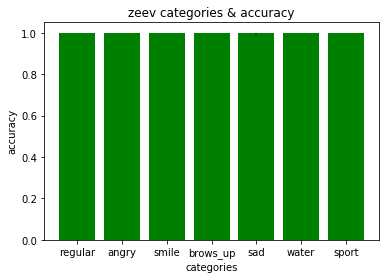

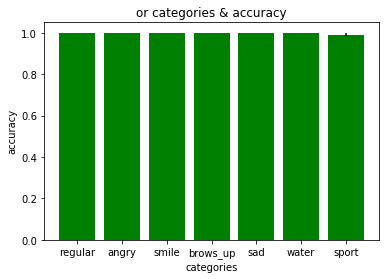

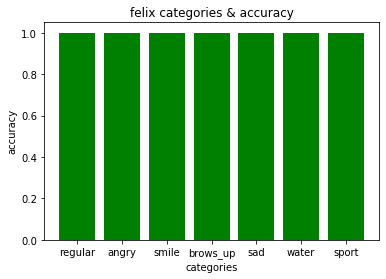

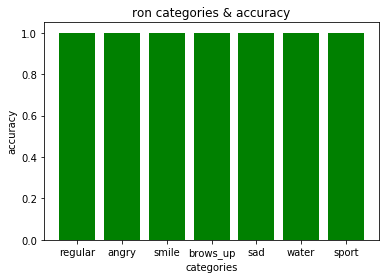

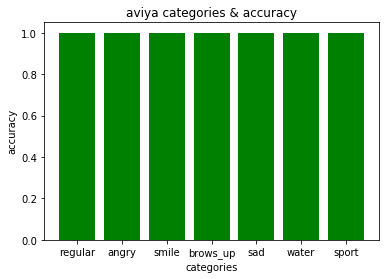

In [17]:
for i, l in enumerate(labels):
    auto_corr = []
    var_by_category = []
    for vc in VID_CAT:
        auto = 0
        var_list = []
        for p in dd[l][vc]['predicted']:
            auto += p[i]
            var_list.append(p[i])
#             print(l, vc, auto / len(dd[l][vc]['predicted']) * 100)
        auto_corr.append(auto / len(dd[l][vc]['predicted']))
        var_by_category.append(np.var(var_list))

    x_pos = [i for i, _ in enumerate(VID_CAT)]
    plt.bar(x_pos, auto_corr, color='green', yerr=var_by_category)
    plt.xlabel("categories")
    plt.ylabel("accuracy")
    plt.title("{0} categories & accuracy".format(l))
    plt.xticks(x_pos, VID_CAT)
    plt.show()

##### graph II

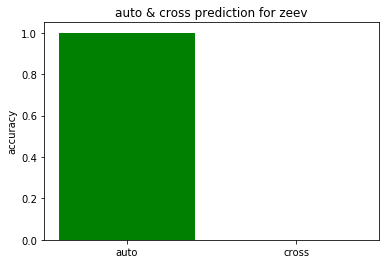

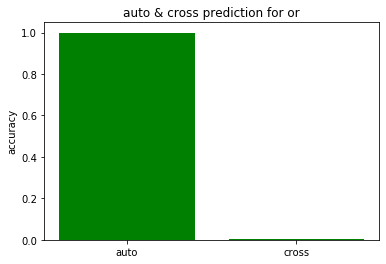

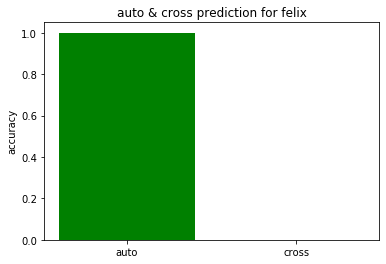

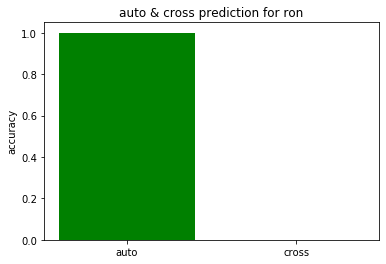

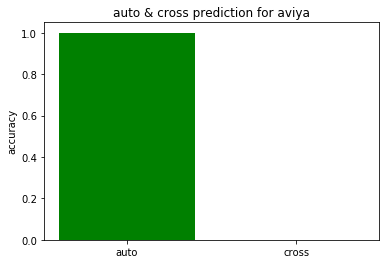

In [18]:
for i, l in enumerate(labels):
    
    auto_var_list = []
    cross_var_list = []
    
    auto = 0
    cross = 0
    
    l_len = 0
    
    for vc in VID_CAT:
        for p in dd[l][vc]['predicted']:
            auto += p[i]
            l_len += 1
            for idx, score in enumerate(p):
                if idx is not i:
                    cross += p[idx]
            auto_var_list.append(p[i])
            cross_var_list.append(np.mean(cross / len(dd[l][vc]['predicted'])))
                
    x_pos = [0, 1]
    total_corr = [(auto / l_len), (cross / l_len)]
    total_var = [(np.var(auto_var_list)), (np.var(cross_var_list))]
    plt.bar(x_pos, total_corr, color='green', yerr=total_var)
    plt.ylabel("accuracy")
    plt.title("auto & cross prediction for {0}".format(l))
    plt.xticks(x_pos, ['auto', 'cross'])
    plt.show()

##### graph II

In [20]:
def plot_auto_cross_graph(x_test, y_test, labels):

    test_predictions = best_loaded.predict(x_test)
    total            = 0
    counter          = 0
    label_name       = ""
    predicted_dict   = {}
    person_total     = {}
    predicted_total  = {}
    auto_std_array   = [[],[],[],[],[],[]]
    cross_std_array  = [[],[],[],[],[],[]]

    
    for lbl in labels:
        person_total[lbl]    = 0

        predicted_dict[lbl]  = {"auto": 0,"cross": 0,"max_auto": 0,"min_auto": 1,\
                               "max_cross": 0,"min_cross": 1,"auto_std":0, "cross_std":0}
       
    predicted_total["total"] = {"auto": 0,"cross": 0,"max_auto": 0,"min_auto": 1,\
                               "max_cross": 0,"min_cross": 1,"auto_std":0, "cross_std":0}
    
    
    for i, lbl in enumerate(y_test):
            total += 1
            auto_value  = test_predictions[i][lbl]
            cross_value = np.sum(test_predictions[i]) - test_predictions[i][lbl]

            auto_std_array[lbl].append(auto_value)
            auto_std_array[len(labels)].append(auto_value)

            cross_std_array[lbl].append(cross_value)
            cross_std_array[len(labels)].append(cross_value)
            
            person_total[labels[lbl]] +=1
            predicted_dict[labels[lbl]]["auto"] += auto_value
            predicted_dict[labels[lbl]]["cross"] += cross_value

            if predicted_dict[labels[lbl]]["max_auto"] < auto_value :
                predicted_dict[labels[lbl]]["max_auto"] = auto_value

            if predicted_dict[labels[lbl]]["max_cross"] < cross_value :
                predicted_dict[labels[lbl]]["max_cross"] = cross_value

            if predicted_dict[labels[lbl]]["min_auto"] > auto_value :
                predicted_dict[labels[lbl]]["min_auto"] = auto_value

            if predicted_dict[labels[lbl]]["min_cross"] > cross_value :
                predicted_dict[labels[lbl]]["min_cross"] = cross_value            

    for k,v in predicted_dict.items():
        for i,lbl in enumerate(labels):
            if i == counter:
                label_name = lbl
                break;
             
        predicted_dict[label_name]["auto_std"]=np.std(auto_std_array[counter])
        predicted_dict[label_name]["cross_std"]=np.std(cross_std_array[counter])        
        predicted_total["total"]["auto"]  += v["auto"]
        predicted_total["total"]["cross"] += v["cross"]

        if predicted_total["total"]["max_auto"]  < v["max_auto"] :
            predicted_total["total"]["max_auto"] = v["max_auto"]

        if predicted_total["total"]["max_cross"]  < v["max_cross"]  :
            predicted_total["total"]["max_cross"] = v["max_cross"]

        if predicted_total["total"]["min_auto"]  > v["min_auto"] :
            predicted_total["total"]["min_auto"] = v["min_auto"]

        if predicted_total["total"]["min_cross"]  > v["min_cross"] :
            predicted_total["total"]["min_cross"] = v["min_cross"]  


        v["auto"]  /= person_total[k]
        v["cross"] /= person_total[k]
        counter += 1

    predicted_total["total"]["auto"]  /= total
    predicted_total["total"]["cross"]  /= total
    predicted_total["total"]["auto_std"]=np.std(auto_std_array[len(labels)])
    predicted_total["total"]["cross_std"]=np.std(cross_std_array[len(labels)])

    z= predicted_dict.copy()
    z.update(predicted_total)
    return z
dict_final_data = plot_auto_cross_graph(x_test, y_test, labels)

In [21]:
dict_final_data

{'zeev': {'auto': 0.9423974432443422,
  'cross': 0.057602548050880435,
  'max_auto': 1.0,
  'min_auto': 1.0417232e-11,
  'max_cross': 1.0000001,
  'min_cross': 0.0,
  'auto_std': 0.2072256,
  'cross_std': 0.2072256},
 'or': {'auto': 0.8937842945174993,
  'cross': 0.10621570110321045,
  'max_auto': 1.0,
  'min_auto': 5.000489e-15,
  'max_cross': 1.0,
  'min_cross': 0.0,
  'auto_std': 0.2701892,
  'cross_std': 0.2701892},
 'ron': {'auto': 0.8949657582217335,
  'cross': 0.10503423629385052,
  'max_auto': 1.0,
  'min_auto': 1.29255955e-11,
  'max_cross': 1.0000001,
  'min_cross': 0.0,
  'auto_std': 0.26371464,
  'cross_std': 0.26371464},
 'aviya': {'auto': 0.9210017833436389,
  'cross': 0.07899820895989736,
  'max_auto': 1.0,
  'min_auto': 5.6616894e-20,
  'max_cross': 1.0000001,
  'min_cross': 0.0,
  'auto_std': 0.2301893,
  'cross_std': 0.2301893},
 'felix': {'auto': 0.9278822561811211,
  'cross': 0.07211773517585936,
  'max_auto': 1.0,
  'min_auto': 9.783192e-19,
  'max_cross': 1.000000

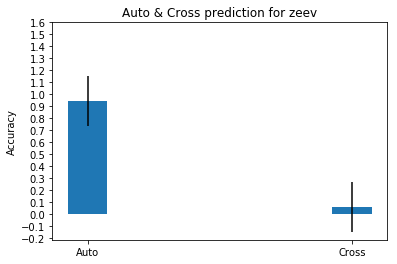

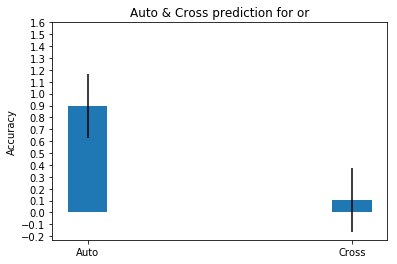

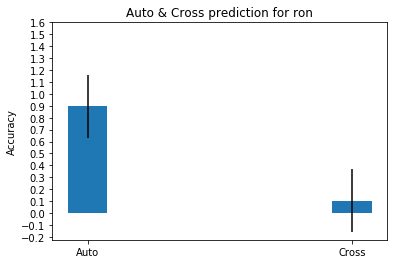

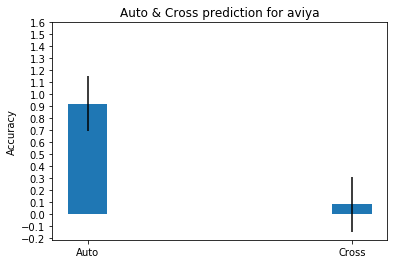

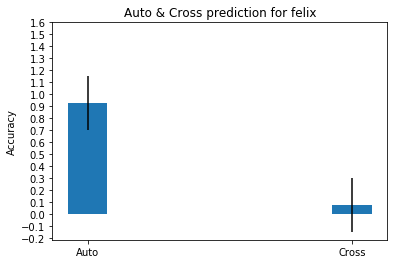

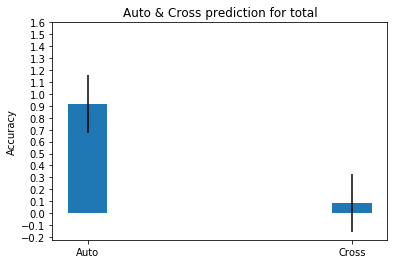

In [24]:
def plot_auto_cross_graph(sample_name,dict_list):
   
    ind     = np.arange(2)
    width   = 0.15
    xticks  = ["Auto", "Cross"]
    y       = [dict_list["auto"],dict_list["cross"]]    
    fig, ax = plt.subplots()  
    ax.bar(ind,y, width=width, yerr=[[abs(dict_list["auto_std"]),abs(dict_list["cross_std"])],\
                                     [abs(dict_list["auto_std"]),abs(dict_list["cross_std"])]])        
    
    plt.title('Auto & Cross prediction for {}'.format(sample_name))  
    plt.xticks(ind, xticks)
    plt.yticks(np.arange(-0.2,1.7,0.1))
    plt.ylabel("Accuracy")
    plt.show()

for k,v in dict_final_data.items():
    plot_auto_cross_graph(k,v)